-xmin, ymin, xmax, ymax:

탐지된 객체의 경계 상자를 나타내는 좌표입니다.  
(xmin, ymin)은 상자의 왼쪽 위 모서리 좌표이며,  
(xmax, ymax)은 상자의 오른쪽 아래 모서리 좌표입니다.  
이 값들은 이미지의 픽셀 단위로 표현됩니다.



# YOLOv8

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
#update 10/22
# YOLOv8 모델 로드
# model = YOLO('yolov8s.pt')

# # 이미지가 있는 폴더 경로
# folder_path = '/home/elicer/FIshing_vessel-1/imgdata'

# # 폴더 내의 모든 이미지 파일 목록 가져오기
# image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png', '.jpeg'))]

# # 이미지 경계 상자와 클래스 시각화
# for image_path in image_paths:
#     # 이미지 로드
#     img = cv2.imread(image_path)
#     if img is None:
#         print(f"이미지를 불러올 수 없습니다: {image_path}")
#         continue
    
#     # 모델로 예측 수행
#     results = model.predict(img)
    
#     # 탐지된 객체가 있는지 확인
#     result = results[0]  # 첫 번째 결과만 사용
#     if len(result.boxes) == 0:
#         print(f"탐지된 객체가 없습니다: {image_path}")
#         continue

    # # 탐지된 객체들에 대해 경계 상자 그리기
    # for box in result.boxes:
    #     xyxy = box.xyxy[0].cpu().numpy().astype(int)
    #     conf = box.conf.item()
    #     cls = int(box.cls.item())

    #     # 경계 상자 그리기
    #     cv2.rectangle(img, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)
        
    #     # 클래스 라벨과 신뢰도 표시
    #     label = f'{model.names[cls]} {conf:.2f}'
    #     cv2.putText(img, label, (xyxy[0], xyxy[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # # 이미지 시각화 (RGB로 변환 후 표시)
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.title(f'Results for {image_path}')
    # plt.axis('off')
    # plt.show()


주요 단계 요약
1. 이미지 로드 및 전처리: 지정된 폴더에서 모든 이미지를 불러오고, 크기를 조정하며 정규화합니다.
2. YOLO 모델로 객체 탐지: 사전 학습된 YOLO 모델을 사용하여 각 이미지에서 객체를 탐지합니다.
3. YOLO 어노테이션 파일 생성: 탐지된 객체의 정보를 YOLO 형식으로 변환하여 각 이미지에 대응하는 .txt 파일로 저장합니다.
4. YAML 파일 생성: YOLO 학습에 필요한 data.yaml 파일을 생성합니다.

## 이미지 사이즈 조정

In [3]:
import os
import cv2

# 이미지가 저장된 폴더 경로
image_folder_path = '/home/elicer/FIshing_vessel-1/imgdata'  # 실제 이미지 폴더 경로로 변경

# 전처리 후 이미지 크기
target_size = (256, 256)

# 이미지 파일 목록 가져오기 (jpg와 png 확장자만)
image_files = [file for file in os.listdir(image_folder_path) if file.lower().endswith(('.jpg', '.png'))]

# 이미지 크기 조정 및 저장
for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    
    # 이미지 읽기
    img = cv2.imread(image_path)
    if img is None:
        print(f"이미지를 불러올 수 없습니다: {image_file}")
        continue
    
    # 이미지 크기 조정
    resized_img = cv2.resize(img, target_size)

    # 같은 파일명으로 저장 (덮어쓰기)
    cv2.imwrite(image_path, resized_img)

    print(f"{image_file} 크기 조정 완료")


1. 낚시어선 이동.jpg 크기 조정 완료
1. 낚시어선 조업.jpg 크기 조정 완료
1. 낚시어선 표류.jpg 크기 조정 완료
1. 등광조망 이동.jpg 크기 조정 완료
1. 등광조망 표류.jpg 크기 조정 완료
1. 범장망 이동.jpg 크기 조정 완료
1. 범장망 조업.jpg 크기 조정 완료
1. 범장망 표류.jpg 크기 조정 완료
1. 안강망 이동.jpg 크기 조정 완료
1. 안강망 조업.jpg 크기 조정 완료
1. 안강망 표류.jpg 크기 조정 완료
1. 연승 이동.jpg 크기 조정 완료
1. 연승 조업.JPG 크기 조정 완료
1. 연승 표류.jpg 크기 조정 완료
1. 유망 이동.jpg 크기 조정 완료
1. 유망 조업.jpg 크기 조정 완료
1. 유망 표류.jpg 크기 조정 완료
1. 저인망 이동.jpg 크기 조정 완료
1. 저인망 조업.jpg 크기 조정 완료
1. 저인망 표류.jpg 크기 조정 완료
1. 채낚기  표류.jpg 크기 조정 완료
1. 채낚기 이동.jpg 크기 조정 완료
1. 채낚기 조업.jpg 크기 조정 완료
1. 타망 이동.jpg 크기 조정 완료
1. 타망 조업.jpg 크기 조정 완료
1. 타망 표류.jpg 크기 조정 완료
1. 통발 이동.jpg 크기 조정 완료
1. 통발 조업.jpg 크기 조정 완료
1. 통발 표류.jpg 크기 조정 완료
1.등광조망 조업.jpg 크기 조정 완료
10. 낚시어선 이동.jpg 크기 조정 완료
10. 낚시어선 조업.jpg 크기 조정 완료
10. 낚시어선 표류.jpg 크기 조정 완료
10. 등광조망 이동.jpg 크기 조정 완료
10. 등광조망 조업.jpg 크기 조정 완료
10. 등광조망 표류.jpg 크기 조정 완료
10. 범장망 이동.jpg 크기 조정 완료
10. 범장망 조업.jpg 크기 조정 완료
10. 범장망 표류.jpg 크기 조정 완료
10. 안강망 이동.jpg 크기 조정 완료
10. 안강망 조업.jpg 크기 조정 완료
10. 안강망 표류.jpg 크기 조정 완료
10. 연승 이동.jpg 크기 조정 완료

In [13]:
import os
import cv2

# 이미지가 저장된 폴더 경로
image_folder_path = '/home/elicer/FIshing_vessel-1/테스트셋'  # 실제 이미지 폴더 경로로 변경

# 전처리 후 이미지 크기
target_size = (256, 256)

# 이미지 파일 목록 가져오기 (jpg와 png 확장자만)
image_files = [file for file in os.listdir(image_folder_path) if file.lower().endswith(('.jpg', '.png'))]

# 이미지 크기 조정 및 저장
for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    
    # 이미지 읽기
    img = cv2.imread(image_path)
    if img is None:
        print(f"이미지를 불러올 수 없습니다: {image_file}")
        continue
    
    # 이미지 크기 조정
    resized_img = cv2.resize(img, target_size)

    # 같은 파일명으로 저장 (덮어쓰기)
    cv2.imwrite(image_path, resized_img)

    print(f"{image_file} 크기 조정 완료")


1.jpg 크기 조정 완료
10.jpg 크기 조정 완료
11.jpg 크기 조정 완료
12.jpg 크기 조정 완료
13.jpg 크기 조정 완료
14.jpg 크기 조정 완료
15.jpg 크기 조정 완료
16.jpg 크기 조정 완료
17.jpg 크기 조정 완료
18.jpg 크기 조정 완료
19.jpg 크기 조정 완료
2.jpg 크기 조정 완료
20.jpg 크기 조정 완료
21.jpg 크기 조정 완료
22.jpg 크기 조정 완료
23.jpg 크기 조정 완료
24.jpg 크기 조정 완료
25.jpg 크기 조정 완료
26.jpg 크기 조정 완료
27.jpg 크기 조정 완료
28.jpg 크기 조정 완료
29.jpg 크기 조정 완료
3.jpg 크기 조정 완료
30.jpg 크기 조정 완료
31.jpg 크기 조정 완료
32.jpg 크기 조정 완료
33.jpg 크기 조정 완료
34.jpg 크기 조정 완료
35.jpg 크기 조정 완료
36.jpg 크기 조정 완료
37.jpg 크기 조정 완료
39.jpg 크기 조정 완료
4.jpg 크기 조정 완료
41.jpg 크기 조정 완료
40.jpg 크기 조정 완료
38.jpg 크기 조정 완료
43.jpg 크기 조정 완료
42.jpg 크기 조정 완료
44.jpg 크기 조정 완료
45.jpg 크기 조정 완료
46.jpg 크기 조정 완료
47.jpg 크기 조정 완료
48.jpg 크기 조정 완료
49.jpg 크기 조정 완료
5.jpg 크기 조정 완료
50.jpg 크기 조정 완료
6.jpg 크기 조정 완료
52.jpg 크기 조정 완료
51.jpg 크기 조정 완료
53.jpg 크기 조정 완료
8.jpg 크기 조정 완료
7.jpg 크기 조정 완료
9.jpg 크기 조정 완료


## YOLO 어노테이션 파일 생성 코드

In [4]:
import os

# 이미지 파일이 저장된 폴더 경로
image_folder_path = '/home/elicer/FIshing_vessel-1/imgdata'  # 실제 이미지 폴더 경로로 변경하세요
annotation_folder_path = '/home/elicer/FIshing_vessel-1/imgdata'  # 어노테이션 파일을 저장할 폴더 경로로 변경하세요

# 클래스 라벨 집합 및 매핑 딕셔너리 생성
class_labels = set()
label_mapping = {}

# 이미지 파일 목록 가져오기
for filename in os.listdir(image_folder_path):
    if filename.endswith(('.jpg', '.png')):
        # 파일명에서 숫자와 점을 제거하고 클래스 이름 추출
        # 예: '1. 낚시어선 이동.jpg' -> '낚시어선'
        parts = filename.split('. ')
        if len(parts) > 1:
            label = parts[1].strip().split()[0]
            class_labels.add(label)

# 클래스 라벨들을 리스트로 변환하여 클래스 ID 매핑 생성
class_labels = list(class_labels)
for idx, label in enumerate(class_labels):
    label_mapping[label] = idx

# 어노테이션 파일 생성
for filename in os.listdir(image_folder_path):
    if filename.endswith(('.jpg', '.png')):
        # 파일명에서 숫자와 점을 제거하고 클래스 이름 추출
        parts = filename.split('. ')
        if len(parts) > 1:
            label = parts[1].strip().split()[0]

            # 매핑된 클래스 ID 가져오기
            class_id = label_mapping[label]

            # 어노테이션 파일 이름 설정 (이미지 파일 이름과 동일하게)
            annotation_filename = os.path.splitext(filename)[0] + '.txt'
            annotation_path = os.path.join(annotation_folder_path, annotation_filename)

            # 어노테이션 파일 생성 (임의의 좌표 값으로 작성)
            with open(annotation_path, 'w') as f:
                # 예시로 임의의 경계 상자 좌표 생성 (중심 좌표 x, y 및 너비와 높이)
                # 여기서는 모든 객체가 이미지의 중앙에 있다고 가정하고 작성함 (0.5, 0.5, 0.2, 0.2)
                f.write(f"{class_id} 0.5 0.5 0.2 0.2\n")

print("어노테이션 파일 생성 완료!")


어노테이션 파일 생성 완료!


## YAML파일 생성코드

In [5]:
import os
import yaml

# YAML 파일을 저장할 경로
yaml_file_path = '/home/elicer/FIshing_vessel-1/img_yaml.yaml'  # 생성할 yaml 파일 경로

# 훈련 및 검증 이미지 경로
images_path = '//home/elicer/FIshing_vessel-1/imgdata'  # 학습 및 검증에 사용할 이미지 경로

# 클래스 이름 (필요에 따라 수정)
class_names =  ['낚시어선','저인망','채낚기','연승','통발','안강망','타망','유망','범장망','등광조망'] # 실제 클래스 이름 목록

# 클래스 개수
nc = len(class_names)

# YAML 파일에 저장할 내용 구성
data_yaml = {
    'train': images_path,  # 학습용 이미지 경로
    'val': images_path,    # 검증용 이미지 경로 (동일한 경로)
    'nc': nc,              # 클래스 개수
    'names': class_names   # 클래스 이름 목록
}

# YAML 파일 생성
with open(yaml_file_path, 'w', encoding='utf-8') as file:
    yaml.dump(data_yaml, file, sort_keys=False)

print(f"data.yaml 파일이 생성되었습니다: {yaml_file_path}")


data.yaml 파일이 생성되었습니다: /home/elicer/FIshing_vessel-1/img_yaml.yaml


## YOLO 모델로 학습하기

In [34]:
from ultralytics import YOLO

# 1. YOLOv8 모델 로드 (사전 학습된 모델 사용)
model = YOLO('yolov8s.pt')  # 또는 'yolov8m.pt', 'yolov8l.pt' 등

# 2. 모델 학습 시작
model.train(data='/home/elicer/FIshing_vessel-1/img_yaml.yaml',  # 생성한 yaml 파일 경로
            epochs=50,             # 학습할 에폭 수 (200으로 통일)
            imgsz=256,              # 이미지 크기
            batch=16,               # 배치 크기
            name='yolo_fishing_vessel')  # 학습 결과 저장 폴더 이름

# 3. 학습 완료 후 검증
results = model.val()

# 4. 모델 저장
model.save('fishing_vessel_model.pt')  # 모델 저장


New https://pypi.org/project/ultralytics/8.3.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.13 🚀 Python-3.10.13 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100 80GB PCIe MIG 3g.40gb, 40448MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/elicer/FIshing_vessel-1/img_yaml.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo_fishing_vessel4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

train: Scanning /home/elicer/FIshing_vessel-1/imgdata.cache... 1519 images, 77 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
val: Scanning /home/elicer/FIshing_vessel-1/imgdata.cache... 1519 images, 77 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolo_fishing_vessel4/labels.jpg... 


/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/plotting.py:909: UserWarning: Glyph 45210 (\N{HANGUL SYLLABLE NAGG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/plotting.py:909: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/plotting.py:909: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/plotting.py:909: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/plotting.py:909: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/home

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 6 dataloader workers
Logging results to runs/detect/yolo_fishing_vessel4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.921G       2.81      4.823      1.957         15        256: 100%|██████████| 100/100 [00:08<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.13it/s]


                   all       1596       1519      0.719     0.0398     0.0149    0.00403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.891G       1.83      3.283      1.335         18        256: 100%|██████████| 100/100 [00:07<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.31it/s]


                   all       1596       1519     0.0834      0.296     0.0894      0.057

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.898G       1.42      2.585      1.201         16        256: 100%|██████████| 100/100 [00:06<00:00, 14.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.75it/s]


                   all       1596       1519      0.213      0.376       0.11     0.0795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      0.86G      1.269      2.305      1.152         18        256: 100%|██████████| 100/100 [00:06<00:00, 14.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.37it/s]


                   all       1596       1519      0.302      0.382      0.131     0.0964

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.879G      1.197      2.206       1.12         20        256: 100%|██████████| 100/100 [00:07<00:00, 13.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.80it/s]

                   all       1596       1519      0.179       0.42      0.147      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.877G      1.154      2.133      1.105         15        256: 100%|██████████| 100/100 [00:07<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.54it/s]

                   all       1596       1519     0.0875      0.494      0.153      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.866G      1.055      2.022      1.063         22        256: 100%|██████████| 100/100 [00:06<00:00, 15.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.89it/s]

                   all       1596       1519      0.179      0.387      0.177       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.879G      1.024      1.939      1.065         23        256: 100%|██████████| 100/100 [00:06<00:00, 14.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.99it/s]

                   all       1596       1519       0.23      0.393      0.185      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.875G       1.02      1.894      1.051         22        256: 100%|██████████| 100/100 [00:07<00:00, 13.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.42it/s]

                   all       1596       1519      0.211      0.539      0.194       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.875G     0.9785      1.874       1.04         15        256: 100%|██████████| 100/100 [00:07<00:00, 14.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.68it/s]

                   all       1596       1519      0.208      0.373      0.198      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.866G     0.9583      1.805       1.03         21        256: 100%|██████████| 100/100 [00:06<00:00, 14.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.73it/s]


                   all       1596       1519      0.154      0.532      0.227      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.868G     0.9039      1.782      1.014         29        256: 100%|██████████| 100/100 [00:07<00:00, 13.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.28it/s]

                   all       1596       1519      0.157      0.436       0.24      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.879G      0.923      1.723      1.013         17        256: 100%|██████████| 100/100 [00:07<00:00, 14.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.01it/s]

                   all       1596       1519      0.164      0.455      0.235      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      0.86G     0.8959      1.715      1.021         18        256: 100%|██████████| 100/100 [00:06<00:00, 14.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.21it/s]

                   all       1596       1519      0.166      0.454      0.256      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.881G      0.869      1.657     0.9973         14        256: 100%|██████████| 100/100 [00:07<00:00, 14.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.47it/s]

                   all       1596       1519      0.191      0.524      0.268       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.877G     0.8533      1.645     0.9913         20        256: 100%|██████████| 100/100 [00:07<00:00, 14.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.11it/s]

                   all       1596       1519      0.503      0.398      0.274       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.872G     0.8713      1.656     0.9931         18        256: 100%|██████████| 100/100 [00:06<00:00, 14.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.72it/s]

                   all       1596       1519      0.193      0.534      0.276      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.866G     0.8516      1.607     0.9952         16        256: 100%|██████████| 100/100 [00:06<00:00, 14.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.83it/s]

                   all       1596       1519       0.19      0.486      0.292      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.877G     0.8251       1.59     0.9799         20        256: 100%|██████████| 100/100 [00:07<00:00, 14.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.03it/s]

                   all       1596       1519       0.28      0.472      0.275      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.856G     0.8037      1.582     0.9738         24        256: 100%|██████████| 100/100 [00:06<00:00, 14.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.39it/s]

                   all       1596       1519      0.188      0.499      0.305      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.877G     0.8193      1.557     0.9772         13        256: 100%|██████████| 100/100 [00:07<00:00, 14.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.81it/s]

                   all       1596       1519      0.311      0.506      0.305      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.872G      0.798      1.559     0.9684         20        256: 100%|██████████| 100/100 [00:07<00:00, 13.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.49it/s]

                   all       1596       1519      0.321      0.473      0.308       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.877G      0.791      1.507     0.9603         20        256: 100%|██████████| 100/100 [00:07<00:00, 14.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.92it/s]

                   all       1596       1519      0.468      0.457      0.337      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.872G     0.7836      1.503     0.9634         17        256: 100%|██████████| 100/100 [00:07<00:00, 13.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.48it/s]

                   all       1596       1519      0.414      0.477      0.329      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      0.86G     0.7593      1.483     0.9651         14        256: 100%|██████████| 100/100 [00:07<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.20it/s]

                   all       1596       1519      0.213      0.527      0.343      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.881G     0.7583      1.424     0.9498         14        256: 100%|██████████| 100/100 [00:07<00:00, 14.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.90it/s]

                   all       1596       1519      0.213      0.549      0.337      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.877G     0.7684      1.454     0.9591         14        256: 100%|██████████| 100/100 [00:07<00:00, 14.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.40it/s]

                   all       1596       1519      0.284      0.539       0.37      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.864G     0.7529      1.428     0.9542         17        256: 100%|██████████| 100/100 [00:07<00:00, 13.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.07it/s]


                   all       1596       1519       0.37      0.512      0.373      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.872G     0.7426      1.413     0.9552         15        256: 100%|██████████| 100/100 [00:06<00:00, 14.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.99it/s]


                   all       1596       1519      0.287      0.537      0.391      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.872G     0.6967      1.373     0.9361         15        256: 100%|██████████| 100/100 [00:06<00:00, 14.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.96it/s]

                   all       1596       1519      0.269      0.542      0.389      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.864G     0.7164      1.365     0.9342         19        256: 100%|██████████| 100/100 [00:07<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.77it/s]

                   all       1596       1519      0.307      0.525      0.398      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.872G     0.7007      1.389      0.943         16        256: 100%|██████████| 100/100 [00:07<00:00, 13.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.70it/s]

                   all       1596       1519      0.472      0.465      0.404      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      0.86G     0.6761      1.318     0.9304         15        256: 100%|██████████| 100/100 [00:06<00:00, 14.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.32it/s]

                   all       1596       1519       0.39      0.562      0.435      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.877G     0.6635      1.284     0.9236         20        256: 100%|██████████| 100/100 [00:06<00:00, 14.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.33it/s]

                   all       1596       1519      0.332      0.601      0.433      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.877G     0.6697      1.299     0.9234         22        256: 100%|██████████| 100/100 [00:07<00:00, 13.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.33it/s]

                   all       1596       1519      0.416      0.557      0.465      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.872G     0.6599      1.282     0.9246         22        256: 100%|██████████| 100/100 [00:07<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.30it/s]

                   all       1596       1519      0.338      0.561       0.46      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      0.86G     0.6405      1.218     0.9179         19        256: 100%|██████████| 100/100 [00:07<00:00, 14.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.12it/s]

                   all       1596       1519      0.337      0.628      0.471      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.877G     0.6649      1.262     0.9308         11        256: 100%|██████████| 100/100 [00:07<00:00, 14.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.42it/s]

                   all       1596       1519      0.579      0.508      0.503      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.872G     0.6255      1.206     0.9187         14        256: 100%|██████████| 100/100 [00:07<00:00, 14.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.80it/s]

                   all       1596       1519      0.377      0.631      0.522      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.856G     0.6292      1.213     0.9139         16        256: 100%|██████████| 100/100 [00:06<00:00, 14.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.25it/s]

                   all       1596       1519      0.503      0.587      0.532      0.481


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.856G     0.5422      1.094     0.9306         12        256: 100%|██████████| 100/100 [00:07<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.06it/s]

                   all       1596       1519      0.397      0.576       0.51       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.872G     0.5082      1.063     0.9038         12        256: 100%|██████████| 100/100 [00:06<00:00, 14.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.28it/s]

                   all       1596       1519      0.418      0.574      0.517      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      0.86G     0.5044      1.032     0.9062         12        256: 100%|██████████| 100/100 [00:06<00:00, 14.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.65it/s]

                   all       1596       1519      0.431      0.623      0.547      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.872G     0.4849      1.021     0.9017         12        256: 100%|██████████| 100/100 [00:06<00:00, 14.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.09it/s]

                   all       1596       1519      0.434      0.647      0.549      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.872G     0.4734     0.9812     0.8973         11        256: 100%|██████████| 100/100 [00:07<00:00, 14.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.18it/s]

                   all       1596       1519      0.444      0.649      0.572      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.877G     0.4593     0.9489     0.8826         12        256: 100%|██████████| 100/100 [00:07<00:00, 14.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.41it/s]

                   all       1596       1519      0.448       0.64      0.575      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      0.86G     0.4569     0.9406     0.8863         12        256: 100%|██████████| 100/100 [00:06<00:00, 14.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.54it/s]

                   all       1596       1519      0.464      0.644      0.583      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.877G     0.4438     0.9434     0.8956         12        256: 100%|██████████| 100/100 [00:07<00:00, 14.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.38it/s]

                   all       1596       1519      0.493      0.622      0.589      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.877G     0.4404     0.9224     0.8819         12        256: 100%|██████████| 100/100 [00:06<00:00, 14.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.29it/s]

                   all       1596       1519      0.482       0.64      0.599      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      0.86G     0.4156     0.9005     0.8714         11        256: 100%|██████████| 100/100 [00:06<00:00, 14.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.69it/s]

                   all       1596       1519      0.486      0.641      0.598      0.553



50 epochs completed in 0.172 hours.
Optimizer stripped from runs/detect/yolo_fishing_vessel4/weights/last.pt, 19.9MB
Optimizer stripped from runs/detect/yolo_fishing_vessel4/weights/best.pt, 19.9MB

Validating runs/detect/yolo_fishing_vessel4/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.13 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100 80GB PCIe MIG 3g.40gb, 40448MiB)
Model summary (fused): 186 layers, 9,831,534 parameters, 0 gradients, 23.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.62it/s]
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 45210 (\N{HANGUL SYLLABLE NAGG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralyti

                   all       1596       1519      0.481      0.643        0.6      0.553
                  낚시어선         57         57      0.331      0.579      0.465      0.433
                   저인망         50         50      0.405        0.2      0.266      0.225
                   채낚기         92         92      0.444      0.837      0.757      0.696
                    연승        360        360      0.571      0.942      0.902      0.829
                    통발         71         71      0.373       0.31      0.295      0.265
                   안강망        436        436      0.854      0.984      0.987      0.939
                    타망        124        124      0.493      0.916      0.782      0.703
                    유망         54         54      0.522      0.593      0.595      0.539
                   범장망         79         79      0.407      0.241      0.328      0.311
                  등광조망        196        196      0.408      0.827      0.619      0.594


/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 45210 (\N{HANGUL SYLLABLE NAGG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_f

Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/yolo_fishing_vessel4
Ultralytics 8.3.13 🚀 Python-3.10.13 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100 80GB PCIe MIG 3g.40gb, 40448MiB)
Model summary (fused): 186 layers, 9,831,534 parameters, 0 gradients, 23.4 GFLOPs


val: Scanning /home/elicer/FIshing_vessel-1/imgdata.cache... 1519 images, 77 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 100/100 [00:05<00:00, 17.21it/s]
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 45210 (\N{HANGUL SYLLABLE NAGG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 49440 (\N{H

                   all       1596       1519      0.484      0.639      0.599      0.553
                  낚시어선         57         57      0.337      0.579      0.465      0.433
                   저인망         50         50      0.411        0.2       0.27      0.227
                   채낚기         92         92      0.448      0.837      0.757      0.698
                    연승        360        360      0.573      0.939      0.902      0.829
                    통발         71         71      0.361      0.282      0.295      0.267
                   안강망        436        436      0.859      0.984      0.987      0.939
                    타망        124        124      0.493      0.911      0.781      0.703
                    유망         54         54      0.529      0.593      0.592      0.535
                   범장망         79         79      0.416      0.241      0.324      0.306
                  등광조망        196        196      0.412      0.821      0.618      0.593


/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 45210 (\N{HANGUL SYLLABLE NAGG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/home/elicer/.local/lib/python3.10/site-packages/ultralytics/utils/metrics.py:432: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_f

Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/yolo_fishing_vessel42


In [ ]:
fishing_vessel_model.pt
/home/elicer/FIshing_vessel-1/img_yaml.yaml  

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# YOLOv8 모델 로드 (이미 사전 학습된 모델 사용)
model = YOLO('fishing_vessel_model.pt')

# 이미지가 있는 폴더 경로 설정
folder_path = '/home/elicer/FIshing_vessel-1/테스트셋'

# 폴더 내의 모든 이미지 파일 목록 가져오기
image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png', '.jpeg'))]

# 이미지 경계 상자와 클래스 시각화
for image_path in image_paths:
    # 이미지 로드
    img = cv2.imread(image_path)
    if img is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        continue
    
    # 모델로 예측 수행
    results = model.predict(img)
    
    # 탐지된 객체가 있는지 확인
    result = results[0]  # 첫 번째 결과만 사용
    if len(result.boxes) == 0:
        print(f"탐지된 객체가 없습니다: {image_path}")
        continue

    # 탐지된 객체들에 대해 경계 상자 그리기
    for box in result.boxes:
        xyxy = box.xyxy[0].cpu().numpy().astype(int)
        conf = box.conf.item()
        cls = int(box.cls.item())

        # 경계 상자 그리기
        cv2.rectangle(img, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)
        
        # 클래스 라벨과 신뢰도 표시
        label = f'{model.names[cls]} {conf:.2f}'
        cv2.putText(img, label, (xyxy[0], xyxy[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # 이미지 시각화 (RGB로 변환 후 표시)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Results for {os.path.basename(image_path)}')
    plt.axis('off')
    plt.show()


0: 448x640 3 연승s, 1 등광조망, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


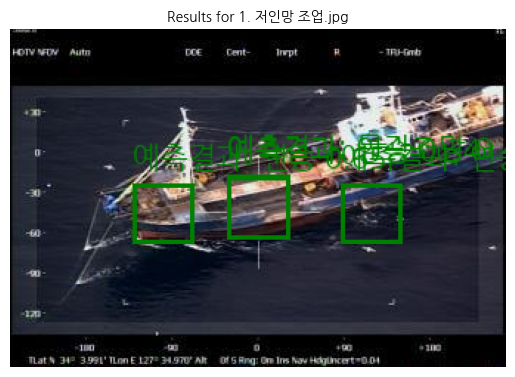


0: 544x640 1 연승, 6.4ms
Speed: 1.8ms preprocess, 6.4ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)


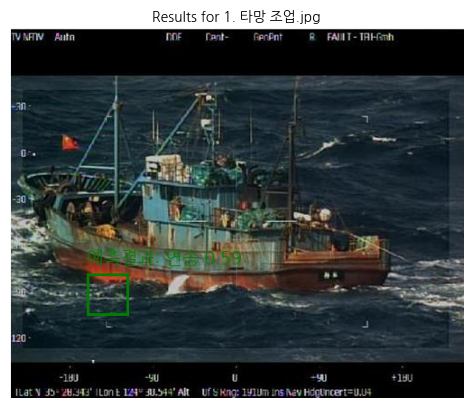


0: 512x640 1 채낚기, 6.5ms
Speed: 1.8ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)


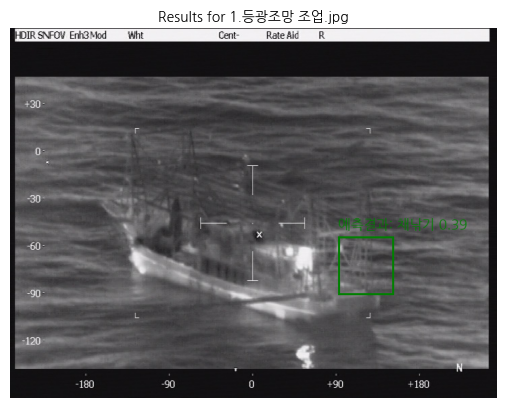


0: 352x640 1 연승, 1 등광조망, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


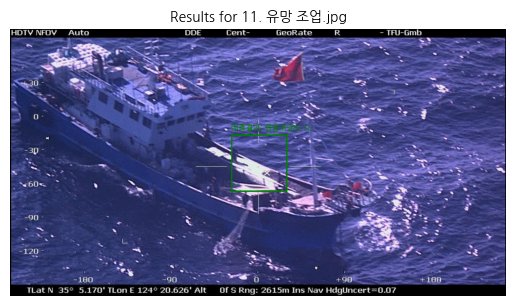


0: 352x640 1 안강망, 1 등광조망, 6.3ms
Speed: 1.5ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


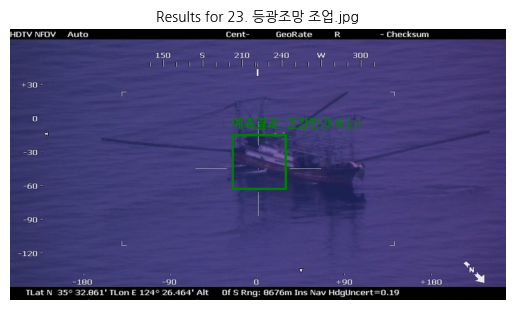


0: 512x640 (no detections), 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)


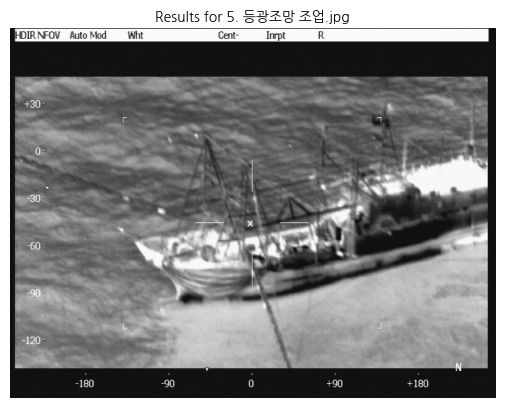


0: 448x640 1 등광조망, 7.3ms
Speed: 2.8ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


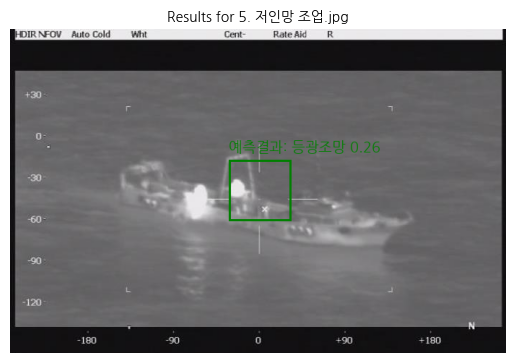


0: 512x640 (no detections), 6.4ms
Speed: 1.7ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)


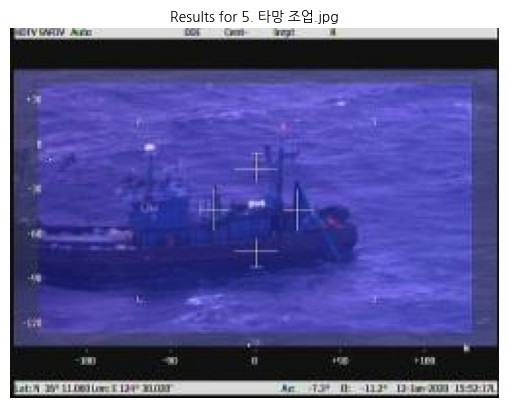


0: 448x640 (no detections), 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


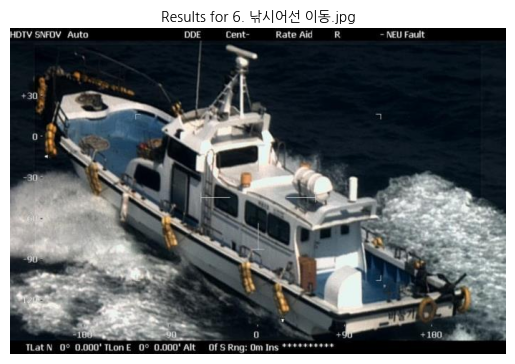


0: 416x640 1 등광조망, 10.5ms
Speed: 3.3ms preprocess, 10.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


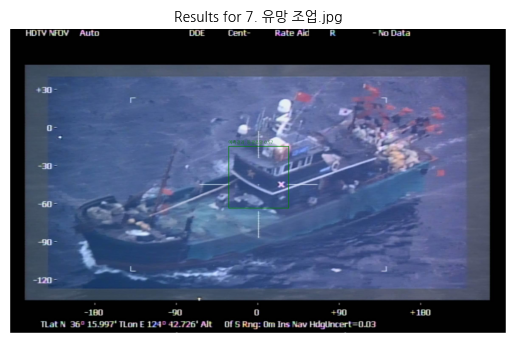


0: 512x640 (no detections), 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


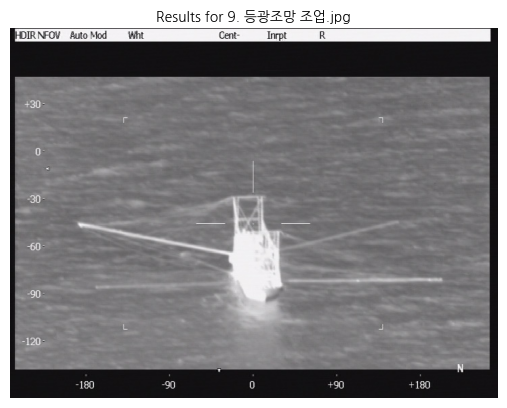


0: 352x640 1 등광조망, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


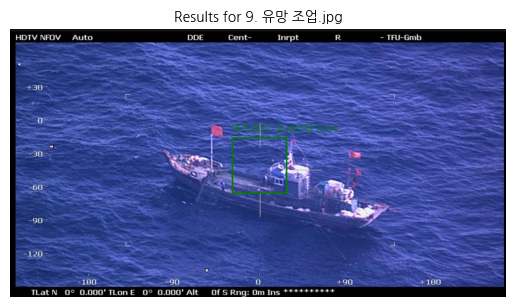


0: 352x640 1 채낚기, 1 연승, 6.4ms
Speed: 1.6ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


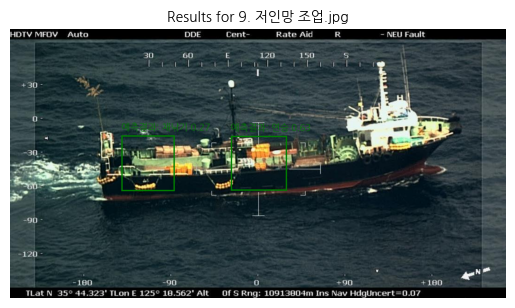


0: 352x640 1 등광조망, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


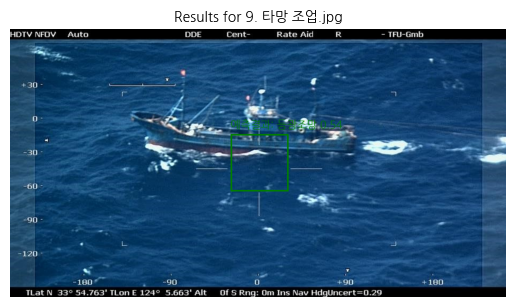

예측 결과 리스트:
파일 이름: 1. 저인망 조업.jpg, 클래스: 연승, 신뢰도: 0.65
파일 이름: 1. 저인망 조업.jpg, 클래스: 등광조망, 신뢰도: 0.48
파일 이름: 1. 저인망 조업.jpg, 클래스: 연승, 신뢰도: 0.34
파일 이름: 1. 저인망 조업.jpg, 클래스: 연승, 신뢰도: 0.26
파일 이름: 1. 타망 조업.jpg, 클래스: 연승, 신뢰도: 0.59
파일 이름: 1.등광조망 조업.jpg, 클래스: 채낚기, 신뢰도: 0.39
파일 이름: 11. 유망 조업.jpg, 클래스: 등광조망, 신뢰도: 0.56
파일 이름: 11. 유망 조업.jpg, 클래스: 연승, 신뢰도: 0.28
파일 이름: 23. 등광조망 조업.jpg, 클래스: 안강망, 신뢰도: 0.43
파일 이름: 23. 등광조망 조업.jpg, 클래스: 등광조망, 신뢰도: 0.28
파일 이름: 5. 저인망 조업.jpg, 클래스: 등광조망, 신뢰도: 0.26
파일 이름: 7. 유망 조업.jpg, 클래스: 등광조망, 신뢰도: 0.57
파일 이름: 9. 유망 조업.jpg, 클래스: 등광조망, 신뢰도: 0.64
파일 이름: 9. 저인망 조업.jpg, 클래스: 연승, 신뢰도: 0.63
파일 이름: 9. 저인망 조업.jpg, 클래스: 채낚기, 신뢰도: 0.27
파일 이름: 9. 타망 조업.jpg, 클래스: 등광조망, 신뢰도: 0.54
객체 인식 결과 확인 및 저장 완료!


In [2]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 사용 가능한 한글 폰트 경로로 변경
if not os.path.exists(font_path):
    raise FileNotFoundError(f"폰트 파일을 찾을 수 없습니다: {font_path}")
font = ImageFont.truetype(font_path, 20)

# 1. 학습된 YOLOv8 모델 로드
model = YOLO('fishing_vessel_model.pt')  # 학습된 모델 가중치 파일 경로

# 2. 이미지 파일 경로 목록 설정
image_folder_path = '/home/elicer/FIshing_vessel-1/mini_test'  # 테스트할 이미지가 있는 폴더 경로
output_folder_path = '/home/elicer/FIshing_vessel-1/결과이미지'  # 결과 이미지를 저장할 폴더 경로
os.makedirs(output_folder_path, exist_ok=True)
image_paths = sorted([os.path.join(image_folder_path, fname) for fname in os.listdir(image_folder_path) if fname.endswith(('.jpg', '.png'))])

# 예측 결과 리스트 초기화
y_true = []  # 실제 값 리스트 (어노테이션 파일이 있는 경우 사용)
y_pred = []  # 예측 결과 리스트

# 3. 이미지에 대한 객체 탐지 및 시각화
for image_path in image_paths:
    # 이미지 로드 (PIL 사용)
    img = Image.open(image_path).convert('RGB')
    if img is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        continue

    # 모델로 예측 수행 (GPU 사용)
    results = model.predict(np.array(img), device='cuda')

    # 탐지 결과를 이미지에 그리기 (PIL 사용)
    img_draw = img.copy()
    draw = ImageDraw.Draw(img_draw)

    for result in results:
        for box in result.boxes:
            # 경계 상자 좌표 및 클래스 정보 가져오기
            xyxy = box.xyxy[0].cpu().numpy().astype(int)
            conf = box.conf.item()
            cls = int(box.cls.item())

            # 예측 결과 저장
            y_pred.append((os.path.basename(image_path), model.names[cls], conf))

            # 경계 상자 그리기
            draw.rectangle([xyxy[0], xyxy[1], xyxy[2], xyxy[3]], outline='green', width=3)

            # 클래스 라벨 및 신뢰도 표시
            label = f"예측결과: {model.names[cls]} {conf:.2f}"
            draw.text((xyxy[0], xyxy[1] - 30), label, fill='green', font=font)

    # 탐지 결과 이미지 저장
    output_path = os.path.join(output_folder_path, os.path.basename(image_path))
    img_draw.save(output_path)

    # 탐지 결과 이미지 시각화 (Matplotlib 사용)
    plt.imshow(img_draw)
    plt.title(f'Results for {os.path.basename(image_path)}', fontproperties=fm.FontProperties(fname=font_path))
    plt.axis('off')
    plt.show()

# 예측 결과 출력
print("예측 결과 리스트:")
for pred in y_pred:
    print(f"파일 이름: {pred[0]}, 클래스: {pred[1]}, 신뢰도: {pred[2]:.2f}")

print("객체 인식 결과 확인 및 저장 완료!")


In [38]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import precision_recall_fscore_support

# YOLOv8 모델 로드 (이미 사전 학습된 모델 사용)
model = YOLO('fishing_vessel_model.pt')

# 이미지가 있는 폴더 경로 설정
folder_path = '/home/elicer/FIshing_vessel-1/테스트셋'
annotation_folder_path = '/home/elicer/FIshing_vessel-1/어노테이션'  # 실제 어노테이션 파일 폴더 경로

# 폴더 내의 모든 이미지 파일 목록 가져오기
image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png', '.jpeg'))]

# 예측 결과와 실제 레이블을 담을 리스트 초기화
y_true = []
y_pred = []

# 이미지 경계 상자와 클래스 시각화
for image_path in image_paths:
    # 이미지 로드
    img = cv2.imread(image_path)
    if img is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        continue
    
    # 모델로 예측 수행
    results = model.predict(img)
    
    # 어노테이션 파일 로드
    annotation_path = os.path.join(annotation_folder_path, os.path.basename(image_path).replace('.jpg', '.txt').replace('.png', '.txt'))
    if not os.path.exists(annotation_path):
        print(f"어노테이션 파일을 찾을 수 없습니다: {annotation_path}")
        continue

    # 어노테이션 파일에서 실제 클래스 정보 추출
    true_classes = []
    with open(annotation_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # 어노테이션 파일의 형식에 맞게 파싱 (여기서는 class_id 중심 좌표(x, y), 너비, 높이 형식이라고 가정)
            parts = line.strip().split()
            class_id = int(parts[0])
            true_classes.append(class_id)
    
    # 탐지된 객체에 대해 클래스 예측 저장
    predicted_classes = []
    result = results[0]  # 첫 번째 결과만 사용
    if len(result.boxes) > 0:
        for box in result.boxes:
            cls = int(box.cls.item())
            predicted_classes.append(cls)
    
    # 실제 클래스와 예측된 클래스를 맞춰서 저장
    max_length = max(len(true_classes), len(predicted_classes))

    # true_classes와 predicted_classes의 길이를 맞춤 (부족한 부분은 -1로 채움)
    true_classes.extend([-1] * (max_length - len(true_classes)))
    predicted_classes.extend([-1] * (max_length - len(predicted_classes)))

    # 전체 리스트에 추가
    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)

# F1 스코어 계산
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")



0: 640x640 (no detections), 5.7ms
Speed: 1.9ms preprocess, 5.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
어노테이션 파일을 찾을 수 없습니다: /home/elicer/FIshing_vessel-1/어노테이션/1.txt

0: 640x640 1 연승, 5.8ms
Speed: 1.8ms preprocess, 5.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
어노테이션 파일을 찾을 수 없습니다: /home/elicer/FIshing_vessel-1/어노테이션/10.txt

0: 640x640 (no detections), 5.7ms
Speed: 1.8ms preprocess, 5.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
어노테이션 파일을 찾을 수 없습니다: /home/elicer/FIshing_vessel-1/어노테이션/11.txt

0: 640x640 2 타망s, 5.7ms
Speed: 1.8ms preprocess, 5.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
어노테이션 파일을 찾을 수 없습니다: /home/elicer/FIshing_vessel-1/어노테이션/12.txt

0: 640x640 1 타망, 5.7ms
Speed: 1.8ms preprocess, 5.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
어노테이션 파일을 찾을 수 없습니다: /home/elicer/FIshing_vessel-1/어노테이션/13.txt

0: 640x640 1 안강망, 5.6ms
Speed: 1.9ms preprocess, 5.6ms in